<a href="https://colab.research.google.com/github/SproutCoder/q4.0/blob/main/farben_lernen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Farben lernen

Die rot, ggrün und blau täne sind die vordefinierten HTML/CSS Farbtöne. Ich habe sie hier kopiert: https://www.rapidtables.com/web/color/red-color.html

In [2]:
import numpy as np

In [8]:
# define Red color values
red_values = np.array([
    [255, 160, 122], [250, 128, 114], [233, 150, 122], [240, 128, 128],
    [205, 92, 92], [220, 20, 60], [178, 34, 34], [255, 0, 0],
    [139, 0, 0], [128, 0, 0], [255, 99, 71], [255, 69, 0], [219, 112, 147]
])

# Defining Green color values
green_values = np.array([
    [124, 252, 0], [127, 255, 0], [50, 205, 50], [0, 255, 0],
    [34, 139, 34], [0, 128, 0], [0, 100, 0], [173, 255, 47],
    [154, 205, 50], [0, 255, 127], [0, 250, 154], [144, 238, 144],
    [152, 251, 152], [143, 188, 143], [60, 179, 113], [32, 178, 170],
    [46, 139, 87], [128, 128, 0], [85, 107, 47], [107, 142, 35]
])

# define Blue color values
blue_values = np.array([
    [240, 248, 255], [230, 230, 250], [176, 224, 230], [173, 216, 230],
    [135, 206, 250], [135, 206, 235], [0, 191, 255], [176, 196, 222],
    [30, 144, 255], [100, 149, 237], [70, 130, 180], [95, 158, 160],
    [123, 104, 238], [106, 90, 205], [72, 61, 139], [65, 105, 225],
    [0, 0, 255], [0, 0, 205], [0, 0, 139], [0, 0, 128], [25, 25, 112],
    [138, 43, 226], [75, 0, 130]
])

#red_values, blue_values, green_values

In [14]:
import plotly.graph_objs as go

# Create traces for red and blue colors
trace_red = go.Scatter3d(
    x=red_values[:, 0], y=red_values[:, 1], z=red_values[:, 2],
    mode='markers',
    marker=dict(size=5, color='red', opacity=0.8),
    name='Red Colors'
)

trace_green = go.Scatter3d(
    x=green_values[:, 0], y=green_values[:, 1], z=green_values[:, 2],
    mode='markers',
    marker=dict(size=5, color='green', opacity=0.8),
    name='Green Colors'
)

trace_blue = go.Scatter3d(
    x=blue_values[:, 0], y=blue_values[:, 1], z=blue_values[:, 2],
    mode='markers',
    marker=dict(size=5, color='blue', opacity=0.8),
    name='Blue Colors'
)

# Define the layout of the plot
layout = go.Layout(
    margin=dict(l=0, r=0, b=0, t=0),
    scene=dict(
        xaxis=dict(title='Red Value'),
        yaxis=dict(title='Green Value'),
        zaxis=dict(title='Blue Value')
    ),
    title='Interactive 3D Scatter Plot of Red and Blue Colors'
)

# Create the figure and display it
fig = go.Figure(data=[trace_red, trace_green, trace_blue], layout=layout)
fig.show()

## 2D Version (ohne grün)

In [16]:
# Simplify the red and blue values to only contain red and blue components
red_simple_values = np.array([[r, b] for r, g, b in red_values])
blue_simple_values = np.array([[r, b] for r, g, b in blue_values])

#red_simple_values, blue_simple_values

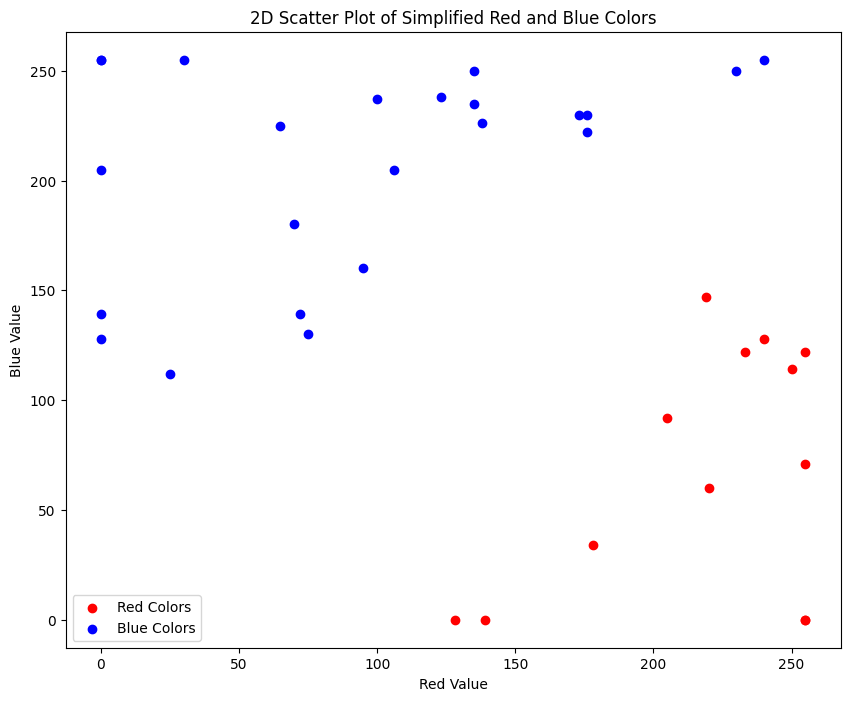

In [17]:
# Create a 2D plot using matplotlib
plt.figure(figsize=(10, 8))

# Plot red_simple_values
plt.scatter(red_simple_values[:, 0], red_simple_values[:, 1], c='red', label='Red Colors')

# Plot blue_simple_values
plt.scatter(blue_simple_values[:, 0], blue_simple_values[:, 1], c='blue', label='Blue Colors')

# Labeling
plt.xlabel('Red Value')
plt.ylabel('Blue Value')
plt.title('2D Scatter Plot of Simplified Red and Blue Colors')
plt.legend()

plt.show()


In [19]:
# Add labels to the simplified red and blue values
# Label for red is 0 and for blue is 1
red_labeled_values = np.array([[r, b, 0] for r, b in red_simple_values])
blue_labeled_values = np.array([[r, b, 1] for r, b in blue_simple_values])

red_labeled_values, blue_labeled_values

(array([[255, 122,   0],
        [250, 114,   0],
        [233, 122,   0],
        [240, 128,   0],
        [205,  92,   0],
        [220,  60,   0],
        [178,  34,   0],
        [255,   0,   0],
        [139,   0,   0],
        [128,   0,   0],
        [255,  71,   0],
        [255,   0,   0],
        [219, 147,   0]]),
 array([[240, 255,   1],
        [230, 250,   1],
        [176, 230,   1],
        [173, 230,   1],
        [135, 250,   1],
        [135, 235,   1],
        [  0, 255,   1],
        [176, 222,   1],
        [ 30, 255,   1],
        [100, 237,   1],
        [ 70, 180,   1],
        [ 95, 160,   1],
        [123, 238,   1],
        [106, 205,   1],
        [ 72, 139,   1],
        [ 65, 225,   1],
        [  0, 255,   1],
        [  0, 205,   1],
        [  0, 139,   1],
        [  0, 128,   1],
        [ 25, 112,   1],
        [138, 226,   1],
        [ 75, 130,   1]]))

In [28]:
from sklearn.model_selection import train_test_split

# Merge the labeled red and blue values into one
all_data = np.vstack((red_labeled_values, blue_labeled_values))

# Split features and labels
X = all_data[:, :2]  # features (R, B)
y = all_data[:, 2]   # labels (0 or 1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Now X_train and y_train can be used for training the model,
# and X_test and y_test for evaluating its performance.

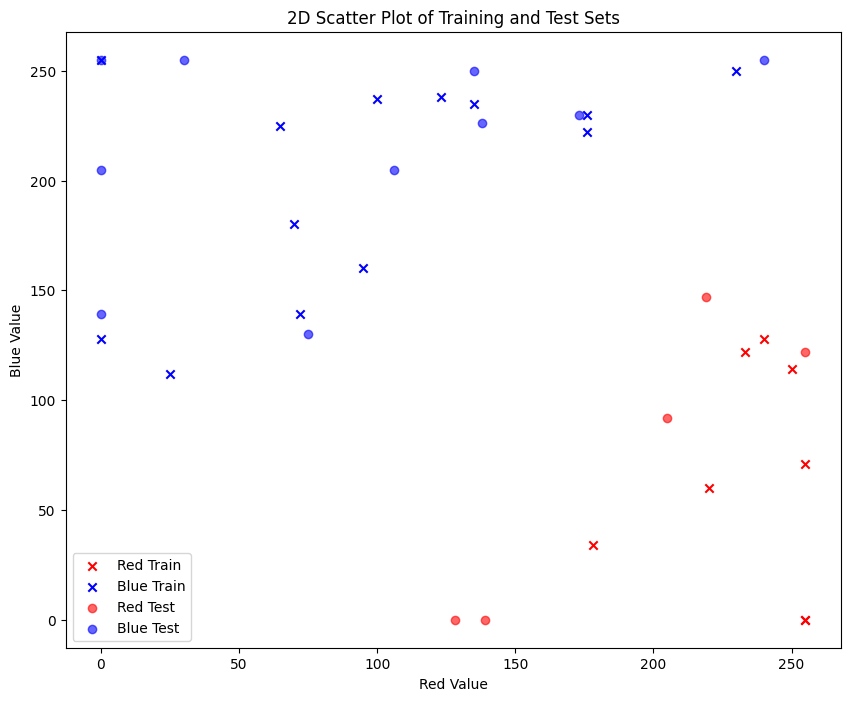

In [29]:
# Create a 2D plot using matplotlib
plt.figure(figsize=(10, 8))

# Plot training data
plt.scatter(X_train[y_train==0][:, 0], X_train[y_train==0][:, 1], c='red', marker='x', label='Red Train')
plt.scatter(X_train[y_train==1][:, 0], X_train[y_train==1][:, 1], c='blue', marker='x', label='Blue Train')

# Plot test data
plt.scatter(X_test[y_test==0][:, 0], X_test[y_test==0][:, 1], c='red', marker='o', label='Red Test', alpha=0.6)
plt.scatter(X_test[y_test==1][:, 0], X_test[y_test==1][:, 1], c='blue', marker='o', label='Blue Test', alpha=0.6)

# Labeling
plt.xlabel('Red Value')
plt.ylabel('Blue Value')
plt.title('2D Scatter Plot of Training and Test Sets')
plt.legend()

plt.show()

## Perceptron implementation

In [31]:
import numpy as np

class Perceptron:
    def __init__(self, learning_rate=0.1, n_iters=1000):
        self.lr = learning_rate  # Learning rate
        self.n_iters = n_iters  # Number of iterations over the training set
        self.activation_func = self._unit_step_func  # Activation function
        self.weights = None
        self.bias = None

    def _unit_step_func(self, x):
        return np.where(x >= 0, 1, 0)

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Initialize weights and bias
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Ensure labels are only 0 or 1
        y_ = np.array([1 if i > 0 else 0 for i in y])

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):

                # Calculate the linear combination of weights and sample + bias
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_func(linear_output)

                # Perceptron update rule
                update = self.lr * (y_[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return self.activation_func(linear_output)

# Now, create a perceptron instance and train it
perceptron = Perceptron(learning_rate=0.01, n_iters=1000)
perceptron.fit(X_train, y_train)

# Make predictions on the test data
predictions = perceptron.predict(X_test)


In [34]:
#  check if the predcitions match the correct labels
print(predictions)
print(y_test)

[1 1 1 1 1 1 1 0 0 1 0 1 0 0 1]
[1 1 1 1 1 1 1 0 0 1 0 1 0 0 1]



Yes, the perceptron does create a decision boundary. In a 2D space, this boundary is a line that separates the two classes. The equation for the decision boundary line derived from the perceptron can be given as w_1x_1 + w_2x_2 + b = 0
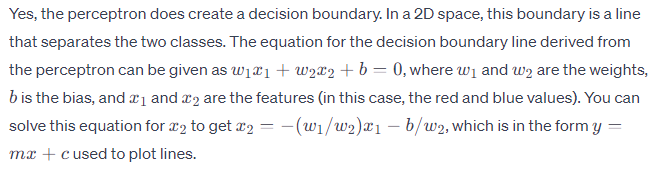

<ipython-input-40-c8e80e9f5054>:15: UserWarning:

You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.



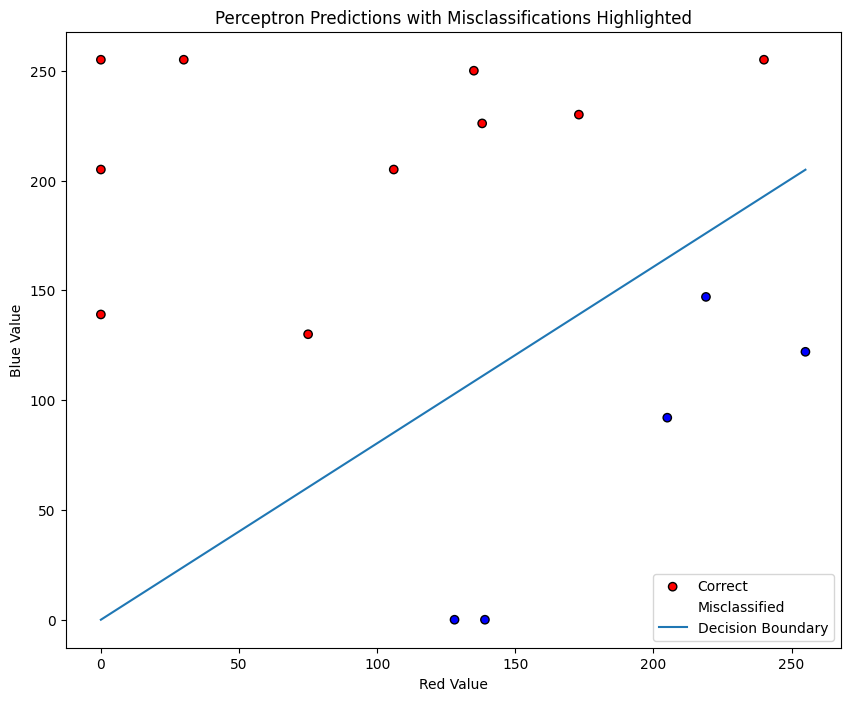

In [40]:
# Predictions on the test set
predictions = perceptron.predict(X_test)
#predictions = np.array([1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0]) # this one is actually wrong to test

# Create a 2D plot using matplotlib
plt.figure(figsize=(10, 8))

# Correct predictions
correct_preds = (predictions == y_test)
plt.scatter(X_test[correct_preds][:, 0], X_test[correct_preds][:, 1], c=y_test[correct_preds],
            marker='o', label='Correct', cmap='bwr', edgecolors='k')

# Misclassifications
incorrect_preds = (predictions != y_test)
plt.scatter(X_test[incorrect_preds][:, 0], X_test[incorrect_preds][:, 1], c=y_test[incorrect_preds],
            marker='x', label='Misclassified', cmap='bwr', s=100, edgecolors='k')


# Calculate the x values of the decision boundary
x_values = np.array([min(X[:, 0]), max(X[:, 0])])

# Calculate the y values of the decision boundary
y_values = -(w1/w2)*x_values - b/w2

# Plot the decision boundary
plt.plot(x_values, y_values, label='Decision Boundary')


# Labeling
plt.xlabel('Red Value')
plt.ylabel('Blue Value')
plt.title('Perceptron Predictions with Misclassifications Highlighted')
plt.legend()

plt.show()